# Importing libraries

In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
import ast
import spacy
import string
import re
import nltk
import ast
import gensim
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.neural_network import MLPClassifier
from scipy.stats import uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
def plot_hist(data):
    plt.figure(figsize=(15, 7))
    weights = np.ones_like(data)/float(len(data))
    plt.hist(data, weights=weights)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.grid()

In [3]:
def check_lookup(key):
    return models.lookup[str(np.array(key))]

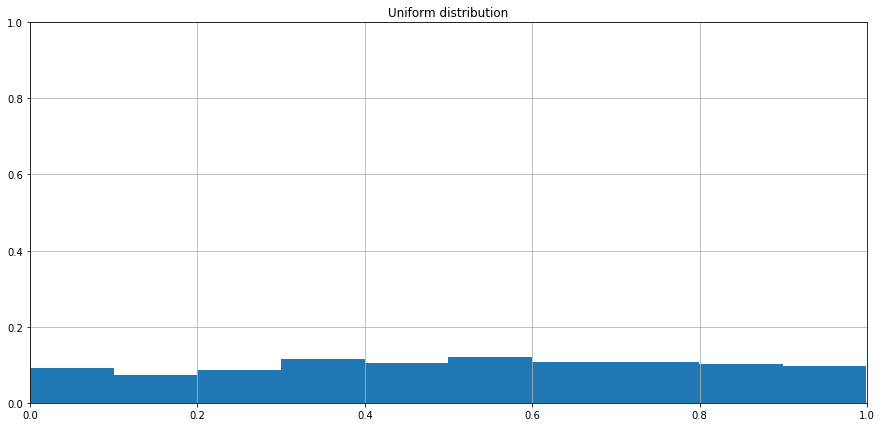

In [4]:
np.random.seed(seed=142)
plot_hist(uniform.rvs(loc=0, scale=1, size=500))
plt.title("Uniform distribution")
plt.show()

# Importing selected models

In [5]:
fullname = "selected_models/14.02.2021_18.36/models.pickle"
file = open(fullname, "rb")
models = pickle.load(file)

In [6]:
models.all_memberships

{0: array([0.55876722, 0.        , 0.27214714, 1.        , 0.21707911,
        1.        , 0.        , 0.75806587, 0.72383457, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.27657062, 0.5241428 , 0.        , 0.        , 0.        ,
        0.92535845, 0.        , 0.        , 0.        , 0.35643987,
        0.        , 0.77503117, 1.        , 0.36541311, 0.        ,
        1.        , 1.        , 0.        , 0.05039149, 0.86066787,
        0.        , 1.        , 1.        , 0.41858897, 0.53199194,
        0.        , 0.88018749, 0.94482976, 1.        , 1.        ,
        0.        , 0.        , 0.8198836 , 1.        , 0.31945478,
        1.        , 0.        , 0.        , 0.61264374, 0.70219674,
        0.        , 1.        , 0.79099459, 0.14722894, 0.77232987,
        1.        , 0.34954586, 1.        , 1.        , 0.4048937 ,
        0.        , 0.88306355, 0.964948  , 1.        , 1.        ,
        0.        , 0.9614489 , 0.        , 1

In [7]:
models.all_labels

{0: array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0]),
 1: array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 2: array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 

In [8]:
models.folds

{'x train 0': array([[ 1.0428438 , -0.5198634 ,  0.12646395, ...,  0.0444528 ,
         -0.62635076, -1.6725181 ],
        [ 0.49381587, -0.23826756,  0.24815886, ..., -0.2583773 ,
         -0.6557733 , -1.6598623 ],
        [-0.29052314, -0.02713703,  0.18784182, ..., -0.57735896,
         -0.791638  , -1.613893  ],
        ...,
        [ 0.52707887, -0.20401531,  0.23766214, ..., -0.38204902,
         -0.75623274, -1.6344525 ],
        [ 0.60953003, -0.3515984 ,  0.11522481, ..., -0.19174136,
         -0.6937208 , -1.6060658 ],
        [-0.04788761, -0.06390925,  0.13038637, ..., -0.5247063 ,
         -0.77975106, -1.6520321 ]]),
 'y train 0': array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0

In [9]:
all_memberships = models.all_memberships
memberships = []

for i in range(0,5):
    for j in all_memberships[i]:
        memberships.append(j)
        
memberships = pd.DataFrame(memberships)

In [10]:
memberships[0:10]

,0
0,0.558767
1,0.000000
2,0.272147
3,1.000000
4,0.217079
5,1.000000
6,0.000000
7,0.758066
8,0.723835
9,1.000000


In [11]:
all_training_memberships = models.all_training_memberships
training_memberships = []

for i in range(0,5):
    for j in all_training_memberships[i]:
        training_memberships.append(j)
        
training_memberships = pd.DataFrame(training_memberships)

In [12]:
training_memberships[0:10]

,0
0,1.000000
1,0.650066
2,0.000000
3,1.000000
4,0.305668
5,0.983126
6,1.000000
7,0.726066
8,1.000000
9,1.000000


In [13]:
all_labels = models.all_labels
labels = []

for i in range(0,5):
    for j in all_labels[i]:
        labels.append(j)
        
labels = pd.DataFrame(labels)

In [14]:
labels[0:10]

,0
0,0
1,0
2,0
3,1
4,0
5,1
6,0
7,1
8,1
9,1


## Retrieve expected memberships

In [15]:
PATH_TEXTS = "generated_datasets/14.02.2021_17.44/generated_dataset_500.csv"

# data loading
dataset = pd.read_csv(PATH_TEXTS)

In [16]:
all_memberships = models.all_memberships
all_folds = models.folds
memberships = []
folds = []

for i in range(0,5):
    for j, k in zip(all_memberships[i], all_folds["x test " + str(i)]):
        memberships.append(j)
        folds.append(k)

In [17]:
total_data = pd.DataFrame(folds)
total_data["x"] = total_data.values.tolist()
for i in range(0,len(total_data.columns) - 1):
    del total_data[i]

In [18]:
total_data["approximated memberships"] = memberships
total_data

,x,approximated memberships
0,"[0.34228808, -0.24853386, 0.06953525, -1.12669...",0.558767
1,"[-0.21283703, -0.11133902, 0.08087758, -1.0212...",0.000000
2,"[0.16090286, -0.16973428, 0.13026284, -1.03378...",0.272147
3,"[0.8087699, -0.4186009, -0.039123718, -1.20644...",1.000000
4,"[0.13339956, -0.13575827, 0.101804905, -1.0236...",0.217079
...,...,...
495,"[0.62736315, -0.3792561, 0.11983463, -1.146960...",0.912755
496,"[1.215556, -0.44440478, 0.22339088, -1.1728154...",1.000000
497,"[0.52707887, -0.20401531, 0.23766214, -1.06906...",0.628492
498,"[0.60953003, -0.3515984, 0.11522481, -1.122681...",0.807471


In [19]:
total_data["expected memberships"] = dataset["membership"]

In [20]:
total_data

,x,approximated memberships,expected memberships
0,"[0.34228808, -0.24853386, 0.06953525, -1.12669...",0.558767,0.457720
1,"[-0.21283703, -0.11133902, 0.08087758, -1.0212...",0.000000,0.158056
2,"[0.16090286, -0.16973428, 0.13026284, -1.03378...",0.272147,0.332429
3,"[0.8087699, -0.4186009, -0.039123718, -1.20644...",1.000000,0.819209
4,"[0.13339956, -0.13575827, 0.101804905, -1.0236...",0.217079,0.318341
...,...,...,...
495,"[0.62736315, -0.3792561, 0.11983463, -1.146960...",0.912755,0.702458
496,"[1.215556, -0.44440478, 0.22339088, -1.1728154...",1.000000,0.978176
497,"[0.52707887, -0.20401531, 0.23766214, -1.06906...",0.628492,0.521144
498,"[0.60953003, -0.3515984, 0.11522481, -1.122681...",0.807471,0.633253


In [21]:
all_training_memberships = models.all_training_memberships
all_folds = models.folds
training_memberships = []
folds = []

for i in range(0,5):
    for j, k in zip(all_training_memberships[i], all_folds["x train " + str(i)]):
        training_memberships.append(j)
        folds.append(k)

In [22]:
total_training_data = pd.DataFrame(folds)
total_training_data["x"] = total_training_data.values.tolist()
for i in range(0,len(total_training_data.columns) - 1):
    del total_training_data[i]

In [23]:
total_training_data["approximated memberships"] = training_memberships
total_training_data

,x,approximated memberships
0,"[1.0428438, -0.5198634, 0.12646395, -1.2517388...",1.000000
1,"[0.49381587, -0.23826756, 0.24815886, -1.07796...",0.650066
2,"[-0.29052314, -0.027137034, 0.18784182, -0.891...",0.000000
3,"[0.9049282, -0.38914347, 0.121224254, -1.16731...",1.000000
4,"[0.18619262, -0.04876464, 0.19429007, -1.03168...",0.305668
...,...,...
1995,"[0.5148643, -0.30977166, 0.16145097, -1.104984...",0.744916
1996,"[0.92804, -0.4211883, 0.052735094, -1.1648171,...",1.000000
1997,"[0.27893853, -0.15135854, 0.24330215, -1.01668...",0.354383
1998,"[-0.33626172, 0.0131562175, 0.16829377, -0.898...",0.000000


In [24]:
total_training_data["x"] = total_training_data["x"].apply(lambda s: tuple(s))
total_training_data

,x,approximated memberships
0,"(1.0428438, -0.5198634, 0.12646395, -1.2517388...",1.000000
1,"(0.49381587, -0.23826756, 0.24815886, -1.07796...",0.650066
2,"(-0.29052314, -0.027137034, 0.18784182, -0.891...",0.000000
3,"(0.9049282, -0.38914347, 0.121224254, -1.16731...",1.000000
4,"(0.18619262, -0.04876464, 0.19429007, -1.03168...",0.305668
...,...,...
1995,"(0.5148643, -0.30977166, 0.16145097, -1.104984...",0.744916
1996,"(0.92804, -0.4211883, 0.052735094, -1.1648171,...",1.000000
1997,"(0.27893853, -0.15135854, 0.24330215, -1.01668...",0.354383
1998,"(-0.33626172, 0.0131562175, 0.16829377, -0.898...",0.000000


In [25]:
total_training_data = total_training_data.drop_duplicates(subset=['x'])

In [26]:
dataset["text"] = dataset["text"].apply(lambda s: ast.literal_eval(s))
dataset["text"] = dataset["text"].apply(lambda s: tuple(s))
dataset

,index,old index,text,membership
0,0,361,"(0.34228808, -0.24853386, 0.06953525, -1.12669...",0.457720
1,1,73,"(-0.21283703, -0.11133902, 0.08087758, -1.0212...",0.158056
2,2,374,"(0.16090286, -0.16973428, 0.13026284, -1.03378...",0.332429
3,3,155,"(0.8087699, -0.4186009, -0.039123718, -1.20644...",0.819209
4,4,104,"(0.13339956, -0.13575827, 0.101804905, -1.0236...",0.318341
...,...,...,...,...
495,495,106,"(0.62736315, -0.3792561, 0.11983463, -1.146960...",0.702458
496,496,270,"(1.215556, -0.44440478, 0.22339088, -1.1728154...",0.978176
497,497,348,"(0.52707887, -0.20401531, 0.23766214, -1.06906...",0.521144
498,498,435,"(0.60953003, -0.3515984, 0.11522481, -1.122681...",0.633253


In [27]:
counter = 0
original_training_data_positions = []

for i in total_training_data.iterrows():
    for j in dataset.iterrows():
        if i[1]["x"] == j[1]["text"]:
            original_training_data_positions.append(j[0])

In [28]:
original_training_data = []

for i in original_training_data_positions:
    original_training_data.append(dataset["membership"].iloc[i])

In [29]:
total_training_data["expected memberships"] = original_training_data
total_training_data

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,x,approximated memberships,expected memberships
0,"(1.0428438, -0.5198634, 0.12646395, -1.2517388...",1.000000,0.952944
1,"(0.49381587, -0.23826756, 0.24815886, -1.07796...",0.650066,0.506925
2,"(-0.29052314, -0.027137034, 0.18784182, -0.891...",0.000000,0.058805
3,"(0.9049282, -0.38914347, 0.121224254, -1.16731...",1.000000,0.774822
4,"(0.18619262, -0.04876464, 0.19429007, -1.03168...",0.305668,0.367185
...,...,...,...
495,"(0.35742876, -0.22786662, 0.1088558, -1.075683...",0.569881,0.486763
496,"(0.2535611, -0.22119443, 0.1667321, -1.0215025...",0.436444,0.405137
497,"(-0.07508594, -0.056197986, 0.16212878, -0.991...",0.000000,0.175502
498,"(-0.0881107, -0.119064696, 0.19706906, -0.9449...",0.000000,0.211718


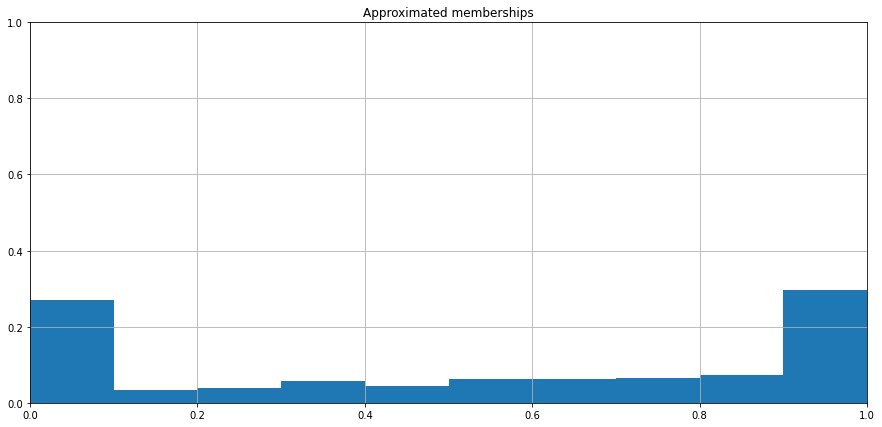

In [30]:
plot_hist(total_data["approximated memberships"])

plt.title("Approximated memberships")
plt.show()

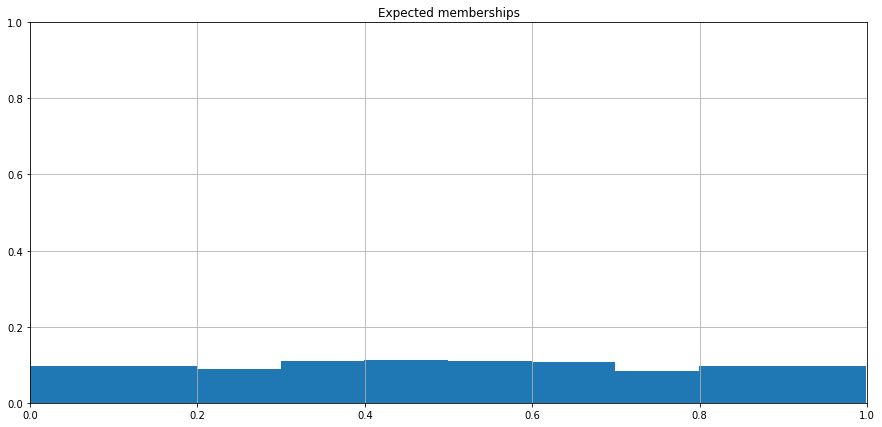

In [31]:
plot_hist(total_data["expected memberships"])

plt.title("Expected memberships")
plt.show()

In [32]:
def square_loss(prediction, y):
    return (y - prediction) ** 2

def RMSE(prediction, y):
    loss = square_loss(prediction, y)
    return np.sqrt(1/len(loss) * sum(loss))

Training error

In [33]:
RMSE(total_training_data["approximated memberships"], total_training_data["expected memberships"])

0.15485694698721164

Test error

In [34]:
RMSE(total_data["approximated memberships"], total_data["expected memberships"])

0.19273187220786486

In [35]:
def select_radius(radius, threshold):
    special_range = [(approx[1], approx[2]) for x, approx in total_data.iterrows() if approx[1] <= threshold + radius and approx[1] >= threshold - radius]
    return special_range

In [36]:
for i in select_radius(0.15, 0.5):
    print(i)

(0.5587672192463357, 0.457719514662481)
(0.5241428027881151, 0.4448259148382305)
(0.3564398711942228, 0.3630687973211884)
(0.3654131116840612, 0.42479967355149095)
(0.41858897135921525, 0.41778946536047856)
(0.5319919386349197, 0.4804685317998239)
(0.6126437437857792, 0.4870434973101976)
(0.4048936973662568, 0.4100590747876023)
(0.47314124260321766, 0.4368978620838906)
(0.4509329960945635, 0.4123982214830445)
(0.5157378230426417, 0.463708165146801)
(0.571880844263345, 0.4791516703674598)
(0.5707678472067673, 0.4867625375530466)
(0.43718573183952303, 0.9529441287148503)
(0.6489284974727172, 0.34221148672800106)
(0.5911288073314152, 0.4878832739626526)
(0.4449015078438179, 0.4056794360940178)
(0.3817625618491236, 0.3672539095142833)
(0.5309363959413185, 0.4549487052534162)
(0.3598925376616954, 0.359500955354634)
(0.5138202848592813, 0.4876763389160194)
(0.5796991935786527, 0.4809136208799497)
(0.5157608896777726, 0.4379515369122369)
(0.40816311716167275, 0.4119696899428398)
(0.4151638967

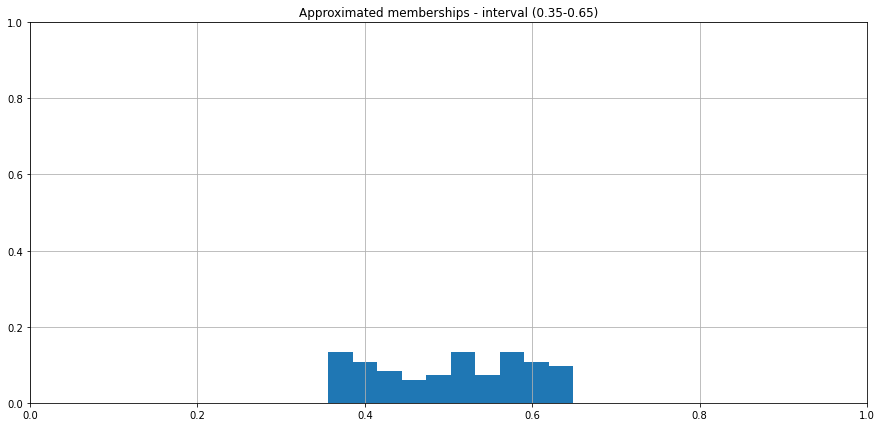

In [37]:
plot_hist([x[0] for x in select_radius(0.15, 0.5)])

plt.title("Approximated memberships - interval (0.35-0.65)")
plt.show()

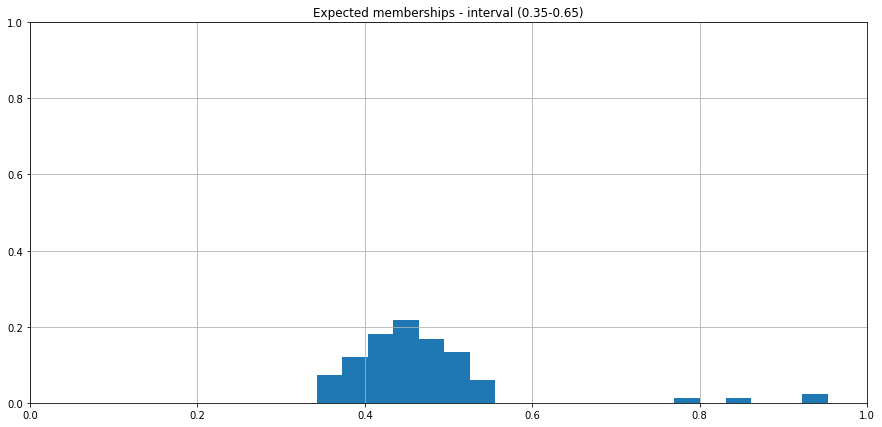

In [38]:
data = [x[1] for x in select_radius(0.15, 0.5)]
plt.figure(figsize=(15, 7))
weights = np.ones_like(data)/float(len(data))
binwidth = (max(data) - min(data)) / 10
plt.hist(data, bins=20, weights=weights)
plt.xlim(0,1)
plt.ylim(0,1)
plt.title("Expected memberships - interval (0.35-0.65)")
plt.grid()

In [39]:
recap = pd.DataFrame([[x[0], x[1]] for x in select_radius(0.15, 0.5)], columns=["approximated", "expected"])
RMSE(recap["approximated"], recap["expected"])

0.12559076123595242

# Baseline (Random Forest)

In [40]:
best_grid = [
    RandomForestRegressor(n_estimators=1000, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, random_state=42),
    RandomForestRegressor(n_estimators=100, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, random_state=42),
    RandomForestRegressor(n_estimators=1000, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, random_state=42),
    RandomForestRegressor(n_estimators=1000, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42),
    RandomForestRegressor(n_estimators=1000, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42)
]

In [41]:
# random_forest = RandomForestRegressor(random_state=42)

# Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

# best_grid = []

# rf_pred_train = []
# rf_pred_test = []

# rf_scores_train = []
# rf_scores_test = []

training_predictions = []
test_predictions = []

for i in range(0,5):
    X_train = models.folds['x train '+str(i)]
    y_train = models.folds['y train '+str(i)]
    X_test = models.folds['x test '+str(i)]
    y_test = models.folds['y test '+str(i)]
    
    # Instantiate the grid search model
    # gs = GridSearchCV(estimator = random_forest, param_grid = param_grid, cv = 4, n_jobs = -1, verbose = 2)
    # gs.fit(X_train, y_train)
    
    # y_pred_train = gs.best_estimator_.predict(X_train)
    # y_pred_test = gs.best_estimator_.predict(X_test)
    
    # best_grid.append(gs.best_estimator_)
    # rf_pred_train.append(y_pred_train)
    # rf_pred_test.append(y_pred_test)
    
    # rf_scores_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    # rf_scores_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    best_grid[i].fit(X_train, y_train)
    
    training_predictions.append((best_grid[i].predict(X_train), X_train))
    test_predictions.append((best_grid[i].predict(X_test), X_test))
    
# print("Training error: ", np.mean(rf_scores_train))
# print("Test error: ", np.mean(rf_scores_test))

In [42]:
for i in best_grid:
    print(i.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, '

In [43]:
baseline_train_predictions = []
baseline_test_predictions = []
baseline_train_data = []
baseline_test_data = []

for i in training_predictions:
    for j, k in zip(i[0],i[1]):
        baseline_train_predictions.append(j)
        baseline_train_data.append(k)
        
for i in test_predictions:
    for j, k in zip(i[0],i[1]):
        baseline_test_predictions.append(j)
        baseline_test_data.append(k)
        
baseline_train = pd.DataFrame(columns=["x", "baseline training memberships"])
baseline_train["x"] = baseline_train_data
baseline_train["baseline training memberships"] = baseline_train_predictions
baseline_train["x"] = baseline_train["x"].apply(lambda s: tuple(s))
baseline_train = baseline_train.drop_duplicates(subset=['x'])
baseline_train["expected memberships"] = total_training_data["expected memberships"]

baseline_test = pd.DataFrame(columns=["x", "baseline test memberships"])
baseline_test["x"] = baseline_test_data
baseline_test["baseline test memberships"] = baseline_test_predictions
baseline_test["x"] = baseline_test["x"].apply(lambda s: tuple(s))
baseline_test = baseline_test.drop_duplicates(subset=['x'])
baseline_test["expected memberships"] = total_data["expected memberships"]

Training error

In [44]:
RMSE(baseline_train["baseline training memberships"], baseline_train["expected memberships"])

0.2661051057426876

Test error

In [45]:
RMSE(baseline_test["baseline test memberships"], baseline_test["expected memberships"])

0.29240960234895064

In [46]:
special_range = [(base[1], base[2]) for x, base in baseline_test.iterrows() if base[1] <= 0.65 and base[1] >= 0.35]
recap = pd.DataFrame([[x[0], x[1]] for x in special_range], columns=["approximated", "expected"])
RMSE(recap["approximated"], recap["expected"])

0.08572841235472377

# Importing selected models - overlay

In [47]:
topic_1 = pd.read_csv("topic_samples/topic_1.csv", header=None)
topic_2 = pd.read_csv("topic_samples/topic_2.csv", header=None)

topic_1_mixed = pd.read_csv("topic_samples/topic_1_mixed.csv", header=None)
topic_2_mixed = pd.read_csv("topic_samples/topic_2_mixed.csv", header=None)

In [48]:
topic_1_words = set(topic_1[0].values[0].split(" "))
topic_2_words = set(topic_2[0].values[0].split(" "))

topic_1_words_mixed = set(topic_1_mixed[0].values[0].split(" "))
topic_2_words_mixed = set(topic_2_mixed[0].values[0].split(" "))

In [49]:
len(topic_1_words_mixed.intersection(topic_1_words))/(len(topic_1_words)), len(topic_1_words_mixed.intersection(topic_2_words))/(len(topic_1_words))

(0.8269230769230769, 0.17307692307692307)

In [50]:
len(topic_2_words_mixed.intersection(topic_1_words))/(len(topic_2_words)), len(topic_2_words_mixed.intersection(topic_2_words))/(len(topic_2_words))

(0.16666666666666666, 0.8333333333333334)

In [51]:
fullname = "selected_models/25.02.2021_11.52/models.pickle"
file = open(fullname, "rb")
models = pickle.load(file)

In [52]:
models.all_memberships

{0: array([1.        , 0.        , 0.        , 0.16252444, 0.69153578,
        0.1921856 , 0.34423745, 0.90441047, 0.79561415, 0.24986154,
        0.30971364, 0.        , 0.29683072, 0.        , 0.24789301,
        0.        , 0.86480142, 0.58252761, 0.65996166, 0.21414104,
        1.        , 0.43729847, 0.76918001, 1.        , 1.        ,
        0.62684965, 1.        , 0.33619688, 0.03153572, 0.45026589,
        0.        , 0.91302259, 0.70058037, 0.59658564, 0.33101883,
        0.        , 0.        , 0.91408838, 0.10937841, 0.37308403,
        1.        , 0.44515032, 0.3574716 , 0.        , 0.40355356,
        1.        , 0.16168433, 0.50408742, 1.        , 1.        ,
        0.69957847, 0.        , 0.21889974, 1.        , 1.        ,
        0.        , 0.09092094, 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.3629326 , 0.31058662, 0.90109967,
        0.        , 0.24414932, 1.        , 0.32373091, 1.        ,
        1.        , 0.        , 0.35807883, 0

In [53]:
models.all_labels

{0: array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 

In [54]:
models.folds

{'x train 0': array([[ 0.38848215, -0.21003947,  0.01540147, ..., -0.13179211,
         -0.6723401 , -1.8467466 ],
        [ 0.08186456, -0.16499013,  0.07753239, ..., -0.08961151,
         -0.7104879 , -1.9010437 ],
        [ 0.13069406, -0.15718353,  0.06804943, ..., -0.07750299,
         -0.6940156 , -1.9079834 ],
        ...,
        [ 0.98815286, -0.44240206, -0.15507288, ..., -0.19164455,
         -0.58792776, -1.6946912 ],
        [ 0.53297746, -0.29794422, -0.11113866, ..., -0.15067829,
         -0.63586664, -1.7595401 ],
        [ 0.10627625, -0.08769777,  0.06049235, ..., -0.1249597 ,
         -0.7475588 , -1.9144751 ]]),
 'y train 0': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1

In [55]:
all_memberships = models.all_memberships
memberships = []

for i in range(0,5):
    for j in all_memberships[i]:
        memberships.append(j)
        
memberships = pd.DataFrame(memberships)

In [56]:
memberships[0:10]

,0
0,1.000000
1,0.000000
2,0.000000
3,0.162524
4,0.691536
5,0.192186
6,0.344237
7,0.904410
8,0.795614
9,0.249862


In [57]:
all_training_memberships = models.all_training_memberships
training_memberships = []

for i in range(0,5):
    for j in all_training_memberships[i]:
        training_memberships.append(j)
        
training_memberships = pd.DataFrame(training_memberships)

In [58]:
training_memberships[0:10]

,0
0,0.203549
1,0.000000
2,0.000000
3,0.000000
4,0.347875
5,0.704834
6,0.000000
7,0.000000
8,0.000000
9,0.388517


In [59]:
all_labels = models.all_labels
labels = []

for i in range(0,5):
    for j in all_labels[i]:
        labels.append(j)
        
labels = pd.DataFrame(labels)

In [60]:
labels[0:10]

,0
0,1
1,0
2,0
3,0
4,1
5,0
6,0
7,1
8,1
9,0


## Retrieve expected memberships - overlay

In [61]:
PATH_TEXTS = "generated_datasets/25.02.2021_11.08/generated_dataset_500.csv"

# data loading
dataset = pd.read_csv(PATH_TEXTS)

In [62]:
all_memberships = models.all_memberships
all_folds = models.folds
memberships = []
folds = []

for i in range(0,5):
    for j, k in zip(all_memberships[i], all_folds["x test " + str(i)]):
        memberships.append(j)
        folds.append(k)

In [63]:
total_data = pd.DataFrame(folds)
total_data["x"] = total_data.values.tolist()
for i in range(0,len(total_data.columns) - 1):
    del total_data[i]

In [64]:
total_data["approximated memberships"] = memberships
total_data

,x,approximated memberships
0,"[0.785377, -0.31237411, -0.029182779, -1.08150...",1.000000
1,"[0.0466405, -0.27165383, -0.034762952, -1.0636...",0.000000
2,"[0.19803432, -0.1708633, 0.04781369, -1.076651...",0.000000
3,"[0.44127396, -0.14210518, 0.0828115, -1.050372...",0.162524
4,"[0.5292288, -0.3136235, -0.022870384, -1.15115...",0.691536
...,...,...
495,"[0.73362106, -0.3298887, -0.05439183, -1.09857...",0.946915
496,"[0.7570295, -0.31823906, -0.101881005, -1.0870...",1.000000
497,"[0.98815286, -0.44240206, -0.15507288, -1.1083...",1.000000
498,"[0.53297746, -0.29794422, -0.11113866, -1.1298...",0.673207


In [65]:
total_data["expected memberships"] = dataset["membership"]

In [66]:
total_data

,x,approximated memberships,expected memberships
0,"[0.785377, -0.31237411, -0.029182779, -1.08150...",1.000000,0.788813
1,"[0.0466405, -0.27165383, -0.034762952, -1.0636...",0.000000,0.030350
2,"[0.19803432, -0.1708633, 0.04781369, -1.076651...",0.000000,0.176250
3,"[0.44127396, -0.14210518, 0.0828115, -1.050372...",0.162524,0.290873
4,"[0.5292288, -0.3136235, -0.022870384, -1.15115...",0.691536,0.535311
...,...,...,...
495,"[0.73362106, -0.3298887, -0.05439183, -1.09857...",0.946915,0.700834
496,"[0.7570295, -0.31823906, -0.101881005, -1.0870...",1.000000,0.789382
497,"[0.98815286, -0.44240206, -0.15507288, -1.1083...",1.000000,0.962959
498,"[0.53297746, -0.29794422, -0.11113866, -1.1298...",0.673207,0.553651


In [67]:
all_training_memberships = models.all_training_memberships
all_folds = models.folds
training_memberships = []
folds = []

for i in range(0,5):
    for j, k in zip(all_training_memberships[i], all_folds["x train " + str(i)]):
        training_memberships.append(j)
        folds.append(k)

In [68]:
total_training_data = pd.DataFrame(folds)
total_training_data["x"] = total_training_data.values.tolist()
for i in range(0,len(total_training_data.columns) - 1):
    del total_training_data[i]

In [69]:
total_training_data["approximated memberships"] = training_memberships
total_training_data

,x,approximated memberships
0,"[0.38848215, -0.21003947, 0.015401471, -1.0445...",0.203549
1,"[0.08186456, -0.16499013, 0.07753239, -1.01303...",0.000000
2,"[0.13069406, -0.15718353, 0.06804943, -1.03328...",0.000000
3,"[0.1438051, -0.12564039, 0.13761431, -1.005147...",0.000000
4,"[0.4254046, -0.19706687, -0.009428527, -1.0414...",0.347875
...,...,...
1995,"[0.56091005, -0.31349623, -0.11197557, -1.1422...",0.832282
1996,"[0.79026645, -0.37629804, -0.14841282, -1.0865...",1.000000
1997,"[0.4936162, -0.30675817, -0.08988794, -1.05235...",0.636469
1998,"[0.6799009, -0.36750937, -0.11251767, -1.07901...",0.936199


In [70]:
total_training_data["x"] = total_training_data["x"].apply(lambda s: tuple(s))
total_training_data

,x,approximated memberships
0,"(0.38848215, -0.21003947, 0.015401471, -1.0445...",0.203549
1,"(0.08186456, -0.16499013, 0.07753239, -1.01303...",0.000000
2,"(0.13069406, -0.15718353, 0.06804943, -1.03328...",0.000000
3,"(0.1438051, -0.12564039, 0.13761431, -1.005147...",0.000000
4,"(0.4254046, -0.19706687, -0.009428527, -1.0414...",0.347875
...,...,...
1995,"(0.56091005, -0.31349623, -0.11197557, -1.1422...",0.832282
1996,"(0.79026645, -0.37629804, -0.14841282, -1.0865...",1.000000
1997,"(0.4936162, -0.30675817, -0.08988794, -1.05235...",0.636469
1998,"(0.6799009, -0.36750937, -0.11251767, -1.07901...",0.936199


In [71]:
total_training_data = total_training_data.drop_duplicates(subset=['x'])

In [72]:
dataset["text"] = dataset["text"].apply(lambda s: ast.literal_eval(s))
dataset["text"] = dataset["text"].apply(lambda s: tuple(s))
dataset

,index,old index,text,membership
0,0,361,"(0.785377, -0.31237411, -0.029182779, -1.08150...",0.788813
1,1,73,"(0.0466405, -0.27165383, -0.034762952, -1.0636...",0.030350
2,2,374,"(0.19803432, -0.1708633, 0.04781369, -1.076651...",0.176250
3,3,155,"(0.44127396, -0.14210518, 0.0828115, -1.050372...",0.290873
4,4,104,"(0.5292288, -0.3136235, -0.022870384, -1.15115...",0.535311
...,...,...,...,...
495,495,106,"(0.73362106, -0.3298887, -0.05439183, -1.09857...",0.700834
496,496,270,"(0.7570295, -0.31823906, -0.101881005, -1.0870...",0.789382
497,497,348,"(0.98815286, -0.44240206, -0.15507288, -1.1083...",0.962959
498,498,435,"(0.53297746, -0.29794422, -0.11113866, -1.1298...",0.553651


In [73]:
counter = 0
original_training_data_positions = []

for i in total_training_data.iterrows():
    for j in dataset.iterrows():
        if i[1]["x"] == j[1]["text"]:
            original_training_data_positions.append(j[0])

In [74]:
original_training_data = []

for i in original_training_data_positions:
    original_training_data.append(dataset["membership"].iloc[i])

In [75]:
total_training_data["expected memberships"] = original_training_data
total_training_data

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,x,approximated memberships,expected memberships
0,"(0.38848215, -0.21003947, 0.015401471, -1.0445...",0.203549,0.291429
1,"(0.08186456, -0.16499013, 0.07753239, -1.01303...",0.000000,0.035911
2,"(0.13069406, -0.15718353, 0.06804943, -1.03328...",0.000000,0.069728
3,"(0.1438051, -0.12564039, 0.13761431, -1.005147...",0.000000,0.098760
4,"(0.4254046, -0.19706687, -0.009428527, -1.0414...",0.347875,0.433983
...,...,...,...
495,"(0.69160914, -0.36666104, -0.1278807, -1.09704...",1.000000,0.785127
496,"(0.9965817, -0.41298968, -0.1111449, -1.113867...",1.000000,0.966980
497,"(0.51996815, -0.23885515, -0.057413492, -1.091...",0.655433,0.536612
498,"(1.0657684, -0.40093976, -0.15685329, -1.04394...",1.000000,0.983456


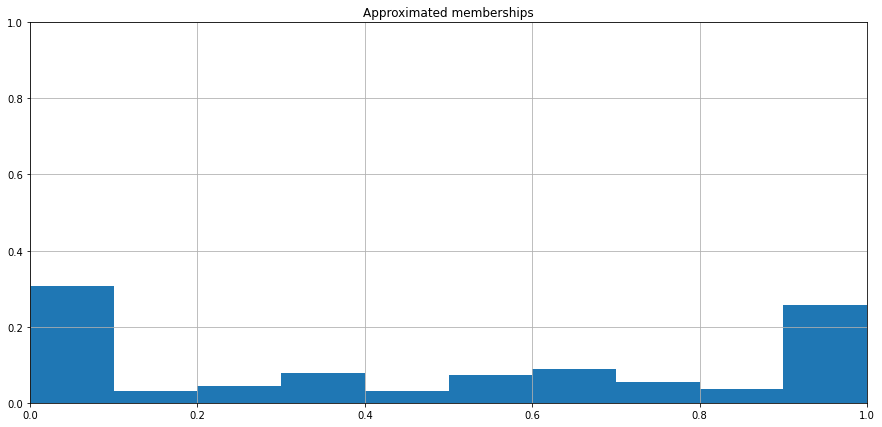

In [76]:
plot_hist(total_data["approximated memberships"])

plt.title("Approximated memberships")
plt.show()

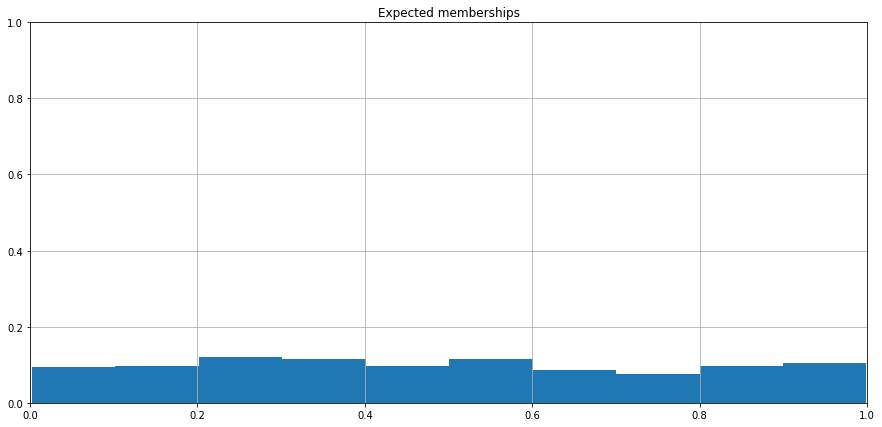

In [77]:
plot_hist(total_data["expected memberships"])

plt.title("Expected memberships")
plt.show()

Training error

In [78]:
RMSE(total_training_data["approximated memberships"], total_training_data["expected memberships"])

0.15143041196354945

Test error

In [79]:
RMSE(total_data["approximated memberships"], total_data["expected memberships"])

0.2719582203294703

In [80]:
for i in select_radius(0.15, 0.5):
    print(i)

(0.582527606018794, 0.5288111988501409)
(0.4372984749001756, 0.4453965149471471)
(0.6268496521445872, 0.4894655445185737)
(0.4502658855177387, 0.4049365363093166)
(0.5965856371849632, 0.5107265725992614)
(0.3730840290422548, 0.3516241310801981)
(0.44515032221764883, 0.4605268509357998)
(0.3574715955939285, 0.3633626892596412)
(0.4035535579878228, 0.4125416804867279)
(0.504087417169524, 0.4361520260033095)
(0.3629325972959243, 0.4126057406026907)
(0.35807882806440827, 0.3843335277145832)
(0.391276742068394, 0.35958426848194713)
(0.399491236234091, 0.3948455563038021)
(0.38450664001405765, 0.9669797721999306)
(0.40400348431785027, 0.42950189572122893)
(0.5334055052787703, 0.4453434647832437)
(0.4501170802814264, 0.4499763158146508)
(0.3619385836855752, 0.3674946697741447)
(0.3687404421486643, 0.4087225356140355)
(0.3767851507231188, 0.4035270424848364)
(0.5084062474394339, 0.39983952796189615)
(0.5226700974807559, 0.4519617079437556)
(0.39126336236448966, 0.3926937907887976)
(0.638473152

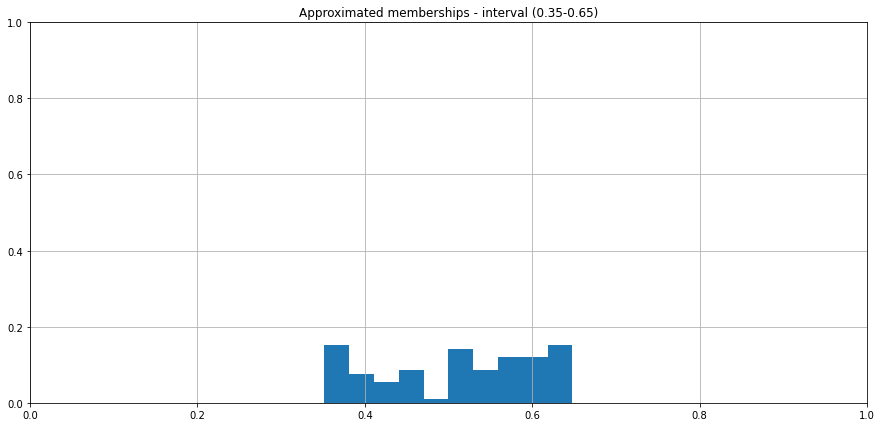

In [81]:
plot_hist([x[0] for x in select_radius(0.15, 0.5)])

plt.title("Approximated memberships - interval (0.35-0.65)")
plt.show()

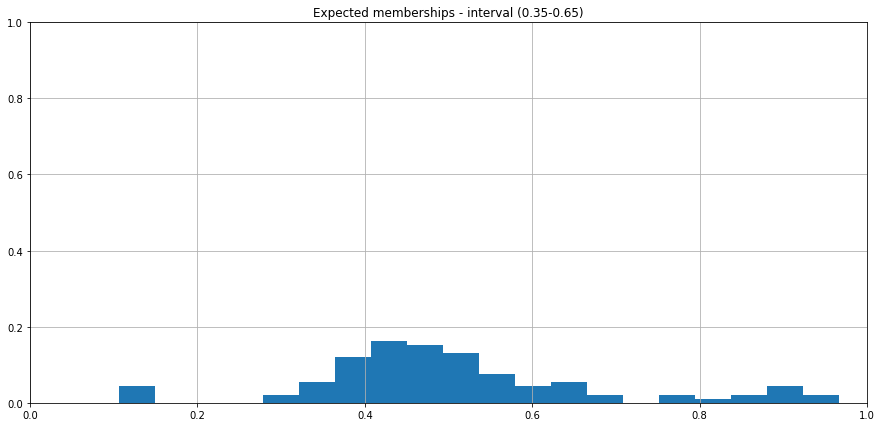

In [82]:
data = [x[1] for x in select_radius(0.15, 0.5)]
plt.figure(figsize=(15, 7))
weights = np.ones_like(data)/float(len(data))
binwidth = (max(data) - min(data)) / 10
plt.hist(data, bins=20, weights=weights)
plt.xlim(0,1)
plt.ylim(0,1)
plt.title("Expected memberships - interval (0.35-0.65)")
plt.grid()

In [83]:
recap = pd.DataFrame([[x[0], x[1]] for x in select_radius(0.15, 0.5)], columns=["approximated", "expected"])
RMSE(recap["approximated"], recap["expected"])

0.16885230356116918

# Baseline (Random Forest)

In [84]:
best_grid = [
    RandomForestRegressor(n_estimators=100, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42),
    RandomForestRegressor(n_estimators=100, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42),
    RandomForestRegressor(n_estimators=100, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, random_state=42),
    RandomForestRegressor(n_estimators=100, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42),
    RandomForestRegressor(n_estimators=100, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42)
]

In [85]:
# random_forest = RandomForestRegressor(random_state=42)

# Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

# best_grid = []

# rf_pred_train = []
# rf_pred_test = []

# rf_scores_train = []
# rf_scores_test = []
training_predictions = []
test_predictions = []

for i in range(0,5):
    X_train = models.folds['x train '+str(i)]
    y_train = models.folds['y train '+str(i)]
    X_test = models.folds['x test '+str(i)]
    y_test = models.folds['y test '+str(i)]
    
    # Instantiate the grid search model
    # gs = GridSearchCV(estimator = random_forest, param_grid = param_grid, cv = 4, n_jobs = -1, verbose = 2)
    # gs.fit(X_train, y_train)
    
    # y_pred_train = gs.best_estimator_.predict(X_train)
    # y_pred_test = gs.best_estimator_.predict(X_test)
    
    # best_grid.append(gs.best_estimator_)
    # rf_pred_train.append(y_pred_train)
    # rf_pred_test.append(y_pred_test)
    
    # rf_scores_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    # rf_scores_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    best_grid[i].fit(X_train, y_train)
    
    training_predictions.append((best_grid[i].predict(X_train), X_train))
    test_predictions.append((best_grid[i].predict(X_test), X_test))
    
# print("Training error: ", np.mean(rf_scores_train))
# print("Test error: ", np.mean(rf_scores_test))

In [86]:
for i in best_grid:
    print(i.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'm

In [87]:
baseline_train_predictions = []
baseline_test_predictions = []
baseline_train_data = []
baseline_test_data = []

for i in training_predictions:
    for j, k in zip(i[0],i[1]):
        baseline_train_predictions.append(j)
        baseline_train_data.append(k)
        
for i in test_predictions:
    for j, k in zip(i[0],i[1]):
        baseline_test_predictions.append(j)
        baseline_test_data.append(k)
        
baseline_train = pd.DataFrame(columns=["x", "baseline training memberships"])
baseline_train["x"] = baseline_train_data
baseline_train["baseline training memberships"] = baseline_train_predictions
baseline_train["x"] = baseline_train["x"].apply(lambda s: tuple(s))
baseline_train = baseline_train.drop_duplicates(subset=['x'])
baseline_train["expected memberships"] = total_training_data["expected memberships"]

baseline_test = pd.DataFrame(columns=["x", "baseline test memberships"])
baseline_test["x"] = baseline_test_data
baseline_test["baseline test memberships"] = baseline_test_predictions
baseline_test["x"] = baseline_test["x"].apply(lambda s: tuple(s))
baseline_test = baseline_test.drop_duplicates(subset=['x'])
baseline_test["expected memberships"] = total_data["expected memberships"]

Training error

In [88]:
RMSE(baseline_train["baseline training memberships"], baseline_train["expected memberships"])

0.23838315947206115

Test error

In [89]:
RMSE(baseline_test["baseline test memberships"], baseline_test["expected memberships"])

0.3258325312450766

In [90]:
special_range = [(base[1], base[2]) for x, base in baseline_test.iterrows() if base[1] <= 0.65 and base[1] >= 0.35]
recap = pd.DataFrame([[x[0], x[1]] for x in special_range], columns=["approximated", "expected"])
RMSE(recap["approximated"], recap["expected"])

0.13727559620507998